<a href="https://colab.research.google.com/github/r2x4/quick__practice/blob/main/quick_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#af7ac5'>**Practica Base Quick Analista de Datos**</h1>

In [178]:
# importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [179]:
# ver las hojas de un xlsx
# Cargar el archivo Excel
base = pd.ExcelFile('/content/BaseQ.xlsx')

# Leer las hojas deseadas
base_principal = base.parse('Base Principal')
base_secundaria = base.parse('Base secundaria')

# Guardar como CSV
base_principal.to_csv('/content/base_principal.csv', index=False)
base_secundaria.to_csv('/content/base_secundaria.csv', index=False)

# <font color='#af7ac5'>**Ver las hojas bases de los datos**</h1>

# <font color='#af7ac5'>**Llamar la base Principal**</h1>

In [180]:
datos_uno = pd.read_csv('/content/base_principal.csv', low_memory=False)
datos_dos = pd.read_csv('/content/base_secundaria.csv')

In [181]:
datos_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ruta                                 15256 non-null  int64  
 1   numero_del_servicio                  15256 non-null  object 
 2   estado                               15256 non-null  object 
 3   creado_por                           15256 non-null  object 
 4   documento_cliente                    15255 non-null  object 
 5   nombre_cliente                       15256 non-null  object 
 6   numero_telefono                      15012 non-null  float64
 7   novedad                              15173 non-null  object 
 8   descripcion_de_novedad               14550 non-null  object 
 9   Ciudad                               15256 non-null  object 
 10  codigo_cedi                          15256 non-null  object 
 11  nombre_cedi                 

In [182]:
datos_uno.rename(columns={'fecha ciruguia': 'fecha_cirugia'}, inplace=True)

In [183]:
columnas_tiempo = [
    'fecha_de_servicio',
    'fecha_cirugia',
    'fecha_de_creacion',
    'tiempo_de_promesa',
    'asignado',
    'aceptado',
    'llegado',
    'reprogramar',
    'cancelado',
    'atendido',
    'finalizado'
]


In [184]:
columnas_tiempo = [
    'fecha_de_servicio',
    'fecha_cirugia',
    'fecha_de_creacion',
    'tiempo_de_promesa',
    'asignado',
    'aceptado',
    'llegado',
    'reprogramar',
    'cancelado',
    'atendido',
    'finalizado'
]

# Convertimos en datos_uno las columnas que sí existan
for col in columnas_tiempo:
    if col in datos_uno.columns:
        datos_uno[col] = pd.to_datetime(datos_uno[col], errors='coerce', dayfirst=True)
    else:
        print(f"Columna no encontrada: {col}")

# Crear df_tiempos con las columnas convertidas que sí existen
columnas_convertidas = [col for col in columnas_tiempo if col in datos_uno.columns]
df_tiempos = datos_uno[columnas_convertidas].copy()

/tmp/ipython-input-184-3604203260.py:18: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  datos_uno[col] = pd.to_datetime(datos_uno[col], errors='coerce', dayfirst=True)
/tmp/ipython-input-184-3604203260.py:18: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  datos_uno[col] = pd.to_datetime(datos_uno[col], errors='coerce', dayfirst=True)
/tmp/ipython-input-184-3604203260.py:18: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  datos_uno[col] = pd.to_datetime(datos_uno[col], errors='coerce', dayfirst=True)
/tmp/ipython-input-184-3604203260.py:18: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format 

In [185]:
datos_uno['finalizado'].dropna().head()

,finalizado
0,2025-02-20 09:13:14
1,2025-03-08 11:29:51
2,2025-02-13 08:23:57
3,2025-03-12 14:45:29
4,2025-02-18 23:55:23


In [186]:
formato_fecha_hora = '%d/%m/%Y %H:%M'

for col in columnas_a_convertir:
    df_tiempos[col] = pd.to_datetime(df_tiempos[col], format=formato_fecha_hora, errors='coerce')

In [187]:
df_tiempos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_de_servicio  15256 non-null  datetime64[ns]
 1   fecha_cirugia      4624 non-null   datetime64[ns]
 2   fecha_de_creacion  15256 non-null  datetime64[ns]
 3   tiempo_de_promesa  15256 non-null  datetime64[ns]
 4   asignado           15230 non-null  datetime64[ns]
 5   aceptado           14831 non-null  datetime64[ns]
 6   llegado            14753 non-null  datetime64[ns]
 7   reprogramar        0 non-null      datetime64[ns]
 8   cancelado          1 non-null      datetime64[ns]
 9   atendido           14758 non-null  datetime64[ns]
 10  finalizado         15176 non-null  datetime64[ns]
dtypes: datetime64[ns](11)
memory usage: 1.3 MB


In [188]:
df_tiempos.head(7)

,fecha_de_servicio,fecha_cirugia,fecha_de_creacion,tiempo_de_promesa,asignado,aceptado,llegado,reprogramar,cancelado,atendido,finalizado
0,2025-02-20,NaT,2025-02-20 08:38:06,2019-12-31 23:59:00,2025-02-20 09:08:29,2025-02-20 09:12:19,2025-02-20 09:12:42,NaT,NaT,2025-02-20 09:12:56,2025-02-20 09:13:14
1,2025-03-08,2025-08-03,2025-03-08 10:13:28,2019-12-31 23:59:00,2025-03-08 10:13:28,2025-03-08 10:26:46,2025-03-08 11:23:49,NaT,NaT,2025-03-08 11:23:52,2025-03-08 11:29:51
2,2025-02-13,2025-12-02,2025-02-13 07:27:23,2019-12-31 23:59:00,2025-02-13 07:27:23,2025-02-13 08:12:47,2025-02-13 08:19:04,NaT,NaT,2025-02-13 08:19:22,2025-02-13 08:23:57
3,2025-03-12,2025-12-03,2025-03-12 10:03:40,2019-12-31 23:59:00,2025-03-12 10:43:30,2025-03-12 10:53:02,2025-03-12 11:17:40,NaT,NaT,2025-03-12 14:44:47,2025-03-12 14:45:29
4,2025-02-18,NaT,2025-02-18 11:10:04,2019-12-31 23:59:00,2025-02-18 22:30:32,2025-02-18 22:49:56,2025-02-18 23:53:05,NaT,NaT,2025-02-18 23:53:07,2025-02-18 23:55:23
5,2025-02-03,2025-03-02,2025-02-03 13:20:46,2019-12-31 23:59:00,2025-02-03 13:20:47,2025-02-03 14:15:02,2025-02-03 14:48:38,NaT,NaT,2025-02-03 14:48:44,2025-02-03 14:49:12
6,2025-02-11,2025-11-02,2025-02-11 08:11:22,2019-12-31 23:59:00,2025-02-11 08:25:27,2025-02-11 08:55:23,2025-02-11 10:21:58,NaT,NaT,2025-02-11 10:51:20,2025-02-11 11:11:44


In [189]:
df_tiempos.isna().sum()

,0
fecha_de_servicio,0
fecha_cirugia,10632
fecha_de_creacion,0
tiempo_de_promesa,0
asignado,26
aceptado,425
llegado,503
reprogramar,15256
cancelado,15255
atendido,498


In [190]:
df_tiempos.isna().mean() * 100

,0
fecha_de_servicio,0.000000
fecha_cirugia,69.690614
fecha_de_creacion,0.000000
tiempo_de_promesa,0.000000
asignado,0.170425
aceptado,2.785789
llegado,3.297063
reprogramar,100.000000
cancelado,99.993445
atendido,3.264289


In [191]:
df_tiempos['duracion_total'] = df_tiempos['finalizado'] - df_tiempos['asignado']

In [192]:
df_tiempos['tiempo_desplazamiento'] = df_tiempos['llegado'] - df_tiempos['asignado']

In [193]:
df_tiempos['tiempo_atencion'] = df_tiempos['finalizado'] - df_tiempos['llegado']

In [194]:
filtro = df_tiempos['duracion_total'] > pd.Timedelta(minutes=60)
casos_largos = df_tiempos[filtro]

In [195]:
df_tiempos['tiempo_atencion_min'] = df_tiempos['tiempo_atencion'].dt.total_seconds() / 60
duracion_promedio = df_tiempos['tiempo_atencion_min'].mean()
print(f'Duración promedio de atención: {duracion_promedio:.2f} minutos')

Duración promedio de atención: 38.15 minutos


In [196]:
# Duración total: desde asignado hasta finalizado
df_tiempos['duracion_total'] = df_tiempos['finalizado'] - df_tiempos['asignado']

# Tiempo de desplazamiento: desde asignado hasta llegado
df_tiempos['tiempo_desplazamiento'] = df_tiempos['llegado'] - df_tiempos['asignado']

# Tiempo de atención: desde llegado hasta finalizado
df_tiempos['tiempo_atencion'] = df_tiempos['finalizado'] - df_tiempos['llegado']


In [197]:
df_tiempos['duracion_total_min'] = df_tiempos['duracion_total'].dt.total_seconds() / 60
df_tiempos['tiempo_desplazamiento_min'] = df_tiempos['tiempo_desplazamiento'].dt.total_seconds() / 60
df_tiempos['tiempo_atencion_min'] = df_tiempos['tiempo_atencion'].dt.total_seconds() / 60

In [198]:
# Tiempo desde la creación hasta la finalización
df_tiempos['tiempo_total_creacion_final'] = df_tiempos['finalizado'] - df_tiempos['fecha_de_creacion']

# Convertir a horas
df_tiempos['tiempo_total_creacion_final_hrs'] = df_tiempos['tiempo_total_creacion_final'].dt.total_seconds() / 3600

# Evaluar si cumple la promesa (menos de 23:59)
promesa_max = pd.to_timedelta("23:59:00")
df_tiempos['cumple_promesa'] = df_tiempos['tiempo_total_creacion_final'] <= promesa_max

In [199]:
df_tiempos['cumple_promesa'].value_counts(normalize=True) * 100

,proportion
cumple_promesa,
True,95.824594
False,4.175406


In [200]:
# Estilo general
sns.set(style='whitegrid')

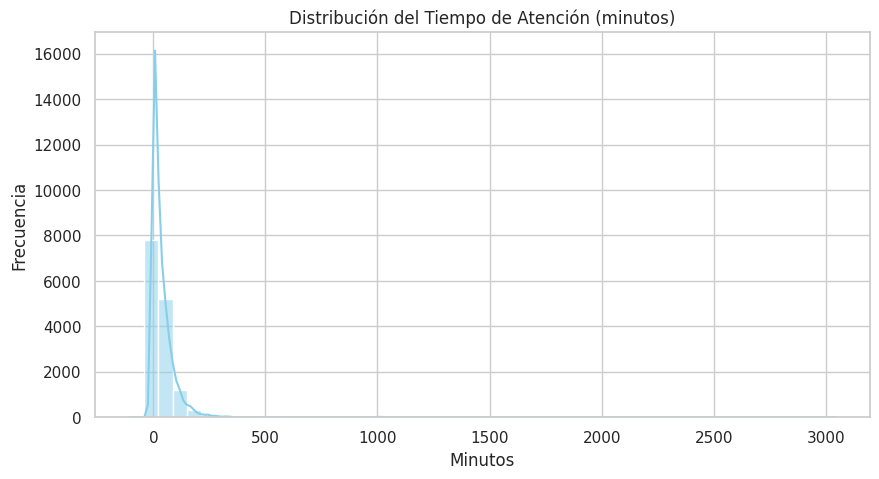

In [201]:
plt.figure(figsize=(10, 5))
sns.histplot(df_tiempos['tiempo_atencion_min'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribución del Tiempo de Atención (minutos)')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

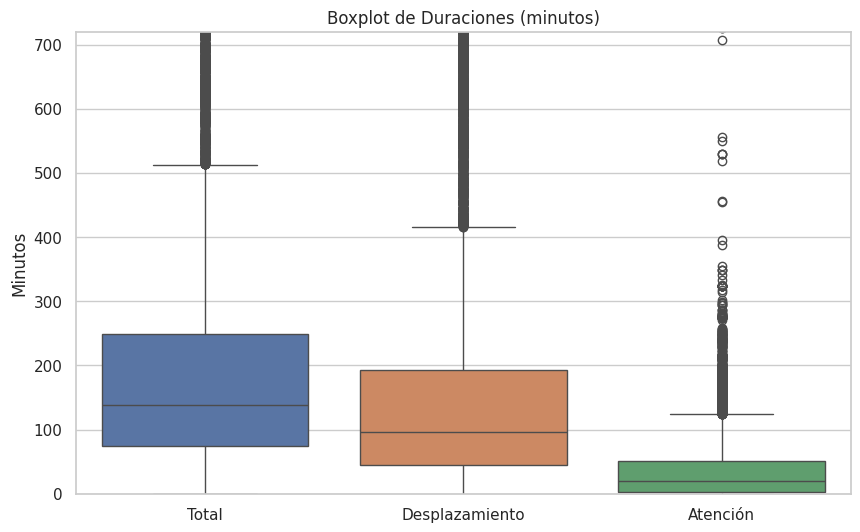

In [202]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tiempos[['duracion_total_min', 'tiempo_desplazamiento_min', 'tiempo_atencion_min']])
plt.title('Boxplot de Duraciones (minutos)')
plt.ylabel('Minutos')
plt.xticks([0, 1, 2], ['Total', 'Desplazamiento', 'Atención'])
plt.ylim(0, 720)  # Ajusta según tu necesidad
plt.show()

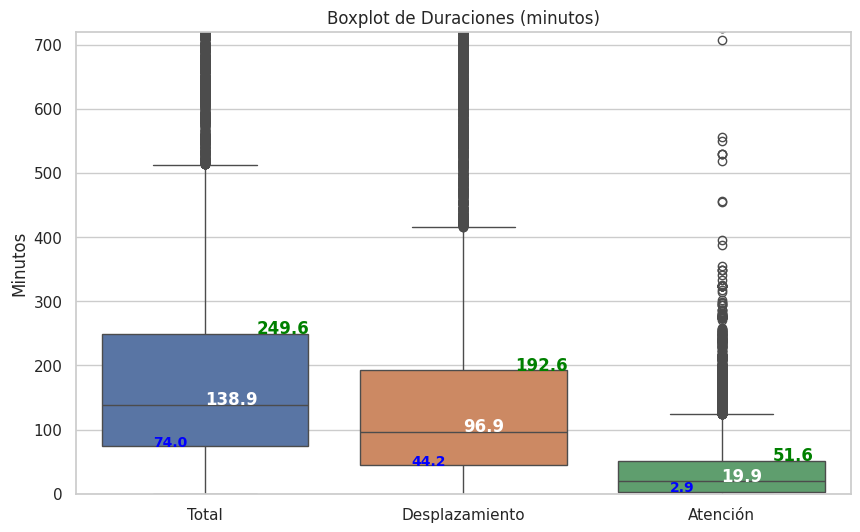

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos que quieres mostrar
columnas = ['duracion_total_min', 'tiempo_desplazamiento_min', 'tiempo_atencion_min']
etiquetas = ['Total', 'Desplazamiento', 'Atención']

# Crea el boxplot
plt.figure(figsize=(10, 6))
box = sns.boxplot(data=df_tiempos[columnas])
plt.title('Boxplot de Duraciones (minutos)')
plt.ylabel('Minutos')
plt.xticks([0, 1, 2], etiquetas)
plt.ylim(0, 720)  # Límites si quieres acotar a 12 horas

# Añade los valores de los cuartiles
for i, col in enumerate(columnas):
    q1 = df_tiempos[col].quantile(0.25)
    q2 = df_tiempos[col].quantile(0.5)  # mediana
    q3 = df_tiempos[col].quantile(0.75)

    plt.text(i - 0.2, q1, f'{q1:.1f}', color='blue', fontsize=10, weight='bold')
    plt.text(i,     q2, f'{q2:.1f}', color='white', fontsize=12, weight='bold')
    plt.text(i + 0.2, q3, f'{q3:.1f}', color='green', fontsize=12, weight='bold')

# Muestra el gráfico

plt.show()



In [204]:
df_tiempos.head(7)

,fecha_de_servicio,fecha_cirugia,fecha_de_creacion,tiempo_de_promesa,asignado,aceptado,llegado,reprogramar,cancelado,atendido,finalizado,duracion_total,tiempo_desplazamiento,tiempo_atencion,tiempo_atencion_min,duracion_total_min,tiempo_desplazamiento_min,tiempo_total_creacion_final,tiempo_total_creacion_final_hrs,cumple_promesa
0,2025-02-20,NaT,2025-02-20 08:38:06,2019-12-31 23:59:00,2025-02-20 09:08:29,2025-02-20 09:12:19,2025-02-20 09:12:42,NaT,NaT,2025-02-20 09:12:56,2025-02-20 09:13:14,0 days 00:04:45,0 days 00:04:13,0 days 00:00:32,0.533333,4.750000,4.216667,0 days 00:35:08,0.585556,True
1,2025-03-08,2025-08-03,2025-03-08 10:13:28,2019-12-31 23:59:00,2025-03-08 10:13:28,2025-03-08 10:26:46,2025-03-08 11:23:49,NaT,NaT,2025-03-08 11:23:52,2025-03-08 11:29:51,0 days 01:16:23,0 days 01:10:21,0 days 00:06:02,6.033333,76.383333,70.350000,0 days 01:16:23,1.273056,True
2,2025-02-13,2025-12-02,2025-02-13 07:27:23,2019-12-31 23:59:00,2025-02-13 07:27:23,2025-02-13 08:12:47,2025-02-13 08:19:04,NaT,NaT,2025-02-13 08:19:22,2025-02-13 08:23:57,0 days 00:56:34,0 days 00:51:41,0 days 00:04:53,4.883333,56.566667,51.683333,0 days 00:56:34,0.942778,True
3,2025-03-12,2025-12-03,2025-03-12 10:03:40,2019-12-31 23:59:00,2025-03-12 10:43:30,2025-03-12 10:53:02,2025-03-12 11:17:40,NaT,NaT,2025-03-12 14:44:47,2025-03-12 14:45:29,0 days 04:01:59,0 days 00:34:10,0 days 03:27:49,207.816667,241.983333,34.166667,0 days 04:41:49,4.696944,True
4,2025-02-18,NaT,2025-02-18 11:10:04,2019-12-31 23:59:00,2025-02-18 22:30:32,2025-02-18 22:49:56,2025-02-18 23:53:05,NaT,NaT,2025-02-18 23:53:07,2025-02-18 23:55:23,0 days 01:24:51,0 days 01:22:33,0 days 00:02:18,2.300000,84.850000,82.550000,0 days 12:45:19,12.755278,True
5,2025-02-03,2025-03-02,2025-02-03 13:20:46,2019-12-31 23:59:00,2025-02-03 13:20:47,2025-02-03 14:15:02,2025-02-03 14:48:38,NaT,NaT,2025-02-03 14:48:44,2025-02-03 14:49:12,0 days 01:28:25,0 days 01:27:51,0 days 00:00:34,0.566667,88.416667,87.850000,0 days 01:28:26,1.473889,True
6,2025-02-11,2025-11-02,2025-02-11 08:11:22,2019-12-31 23:59:00,2025-02-11 08:25:27,2025-02-11 08:55:23,2025-02-11 10:21:58,NaT,NaT,2025-02-11 10:51:20,2025-02-11 11:11:44,0 days 02:46:17,0 days 01:56:31,0 days 00:49:46,49.766667,166.283333,116.516667,0 days 03:00:22,3.006111,True


In [205]:
# Asegurarnos de que las columnas sean datetime
df_tiempos['fecha_de_creacion'] = pd.to_datetime(df_tiempos['fecha_de_creacion'], errors='coerce')
df_tiempos['finalizado'] = pd.to_datetime(df_tiempos['finalizado'], errors='coerce')

# Calcular diferencia
df_tiempos['tiempo_real'] = df_tiempos['finalizado'] - df_tiempos['fecha_de_creacion']

# Convertir a horas y comparar con 23:59
df_tiempos['cumplimiento_promesa'] = df_tiempos['tiempo_real'] <= pd.Timedelta(hours=23, minutes=59)


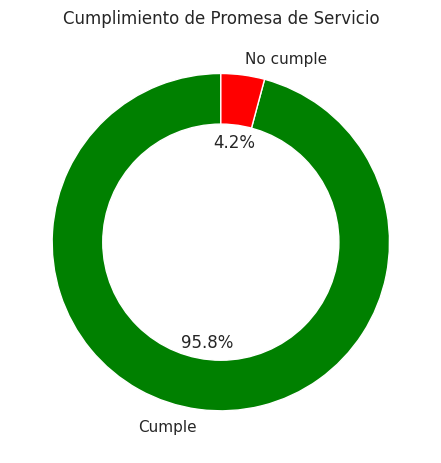

In [206]:
import matplotlib.pyplot as plt

# Contar los valores True y False
cumplimiento_counts = df_tiempos['cumplimiento_promesa'].value_counts()

# Etiquetas y colores
labels = ['Cumple', 'No cumple']
colors = ['green', 'red']

# Gráfico de rosquilla
fig, ax = plt.subplots()
ax.pie(cumplimiento_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

# Añadir círculo blanco en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Cumplimiento de Promesa de Servicio')
plt.tight_layout()
plt.show()


In [207]:
df_tiempos['cumplimiento_promesa'] = df_tiempos['cumplimiento_promesa'].replace({True: 'Cumplio', False: 'No cumplio'})

In [208]:
df_tiempos.head(7)

,fecha_de_servicio,fecha_cirugia,fecha_de_creacion,tiempo_de_promesa,asignado,aceptado,llegado,reprogramar,cancelado,atendido,...,tiempo_desplazamiento,tiempo_atencion,tiempo_atencion_min,duracion_total_min,tiempo_desplazamiento_min,tiempo_total_creacion_final,tiempo_total_creacion_final_hrs,cumple_promesa,tiempo_real,cumplimiento_promesa
0,2025-02-20,NaT,2025-02-20 08:38:06,2019-12-31 23:59:00,2025-02-20 09:08:29,2025-02-20 09:12:19,2025-02-20 09:12:42,NaT,NaT,2025-02-20 09:12:56,...,0 days 00:04:13,0 days 00:00:32,0.533333,4.750000,4.216667,0 days 00:35:08,0.585556,True,0 days 00:35:08,Cumplio
1,2025-03-08,2025-08-03,2025-03-08 10:13:28,2019-12-31 23:59:00,2025-03-08 10:13:28,2025-03-08 10:26:46,2025-03-08 11:23:49,NaT,NaT,2025-03-08 11:23:52,...,0 days 01:10:21,0 days 00:06:02,6.033333,76.383333,70.350000,0 days 01:16:23,1.273056,True,0 days 01:16:23,Cumplio
2,2025-02-13,2025-12-02,2025-02-13 07:27:23,2019-12-31 23:59:00,2025-02-13 07:27:23,2025-02-13 08:12:47,2025-02-13 08:19:04,NaT,NaT,2025-02-13 08:19:22,...,0 days 00:51:41,0 days 00:04:53,4.883333,56.566667,51.683333,0 days 00:56:34,0.942778,True,0 days 00:56:34,Cumplio
3,2025-03-12,2025-12-03,2025-03-12 10:03:40,2019-12-31 23:59:00,2025-03-12 10:43:30,2025-03-12 10:53:02,2025-03-12 11:17:40,NaT,NaT,2025-03-12 14:44:47,...,0 days 00:34:10,0 days 03:27:49,207.816667,241.983333,34.166667,0 days 04:41:49,4.696944,True,0 days 04:41:49,Cumplio
4,2025-02-18,NaT,2025-02-18 11:10:04,2019-12-31 23:59:00,2025-02-18 22:30:32,2025-02-18 22:49:56,2025-02-18 23:53:05,NaT,NaT,2025-02-18 23:53:07,...,0 days 01:22:33,0 days 00:02:18,2.300000,84.850000,82.550000,0 days 12:45:19,12.755278,True,0 days 12:45:19,Cumplio
5,2025-02-03,2025-03-02,2025-02-03 13:20:46,2019-12-31 23:59:00,2025-02-03 13:20:47,2025-02-03 14:15:02,2025-02-03 14:48:38,NaT,NaT,2025-02-03 14:48:44,...,0 days 01:27:51,0 days 00:00:34,0.566667,88.416667,87.850000,0 days 01:28:26,1.473889,True,0 days 01:28:26,Cumplio
6,2025-02-11,2025-11-02,2025-02-11 08:11:22,2019-12-31 23:59:00,2025-02-11 08:25:27,2025-02-11 08:55:23,2025-02-11 10:21:58,NaT,NaT,2025-02-11 10:51:20,...,0 days 01:56:31,0 days 00:49:46,49.766667,166.283333,116.516667,0 days 03:00:22,3.006111,True,0 days 03:00:22,Cumplio


In [209]:
df_tiempos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   fecha_de_servicio                15256 non-null  datetime64[ns] 
 1   fecha_cirugia                    4624 non-null   datetime64[ns] 
 2   fecha_de_creacion                15256 non-null  datetime64[ns] 
 3   tiempo_de_promesa                15256 non-null  datetime64[ns] 
 4   asignado                         15230 non-null  datetime64[ns] 
 5   aceptado                         14831 non-null  datetime64[ns] 
 6   llegado                          14753 non-null  datetime64[ns] 
 7   reprogramar                      0 non-null      datetime64[ns] 
 8   cancelado                        1 non-null      datetime64[ns] 
 9   atendido                         14758 non-null  datetime64[ns] 
 10  finalizado                       15176 non-nul

In [210]:
df_tiempos['duracion_total_min'] = df_tiempos['duracion_total'] / pd.Timedelta(minutes=1)
df_tiempos['tiempo_desplazamiento_min'] = df_tiempos['tiempo_desplazamiento'] / pd.Timedelta(minutes=1)
df_tiempos['tiempo_total_creacion_final_hrs'] = df_tiempos['tiempo_total_creacion_final'] / pd.Timedelta(hours=1)

In [211]:
df_tiempos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   fecha_de_servicio                15256 non-null  datetime64[ns] 
 1   fecha_cirugia                    4624 non-null   datetime64[ns] 
 2   fecha_de_creacion                15256 non-null  datetime64[ns] 
 3   tiempo_de_promesa                15256 non-null  datetime64[ns] 
 4   asignado                         15230 non-null  datetime64[ns] 
 5   aceptado                         14831 non-null  datetime64[ns] 
 6   llegado                          14753 non-null  datetime64[ns] 
 7   reprogramar                      0 non-null      datetime64[ns] 
 8   cancelado                        1 non-null      datetime64[ns] 
 9   atendido                         14758 non-null  datetime64[ns] 
 10  finalizado                       15176 non-nul

In [212]:
df_tiempos.to_csv('df_tiempos_limpio.csv', index=False)


In [213]:
# Añadir las columnas calculadas en df_tiempos al DataFrame principal datos_uno
datos_uno = pd.concat([
    datos_uno,
    df_tiempos[[
        'duracion_total', 'tiempo_desplazamiento', 'tiempo_atencion',
        'tiempo_atencion_min', 'duracion_total_min', 'tiempo_desplazamiento_min',
        'tiempo_total_creacion_final', 'tiempo_total_creacion_final_hrs',
        'cumple_promesa', 'tiempo_real', 'cumplimiento_promesa'
    ]]
], axis=1)


In [214]:
datos_uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   ruta                                 15256 non-null  int64          
 1   numero_del_servicio                  15256 non-null  object         
 2   estado                               15256 non-null  object         
 3   creado_por                           15256 non-null  object         
 4   documento_cliente                    15255 non-null  object         
 5   nombre_cliente                       15256 non-null  object         
 6   numero_telefono                      15012 non-null  float64        
 7   novedad                              15173 non-null  object         
 8   descripcion_de_novedad               14550 non-null  object         
 9   Ciudad                               15256 non-null  object         
 10

In [215]:
datos_uno.drop(columns=['link_de_imagenes', 'firmas', 'cantidad_de_imagenes'], inplace=True)


In [216]:
datos_uno.to_csv('base_limpia.csv', index=False)